In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from tqdm import tqdm

In [19]:
def confusion_matrix_plot(data, title):
  
  
  threshold = 0.5
  y_pred_prob = list(data['predicted_label'])
 
  data['predicted_binary'] =  [1 if prob >= threshold else 0 for prob in y_pred_prob]
#  return data

  true_labels = data['True_Label']
  predicted_labels= data['predicted_binary']


  conf_matrix = confusion_matrix(true_labels, predicted_labels)
  class_labels = ['Not-Fraud', 'Fraud']

  # Create a heatmap using seaborn
  plt.figure(figsize=(6, 4))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', xticklabels=class_labels, yticklabels=class_labels)

  # Add labels, title, and display the plot
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'{title} laundering')
  plt.savefig(f'all_bank_data/{title}.png')
  plt.show()
  # Calculate precision, recall, and F1-score
  precision = precision_score(true_labels, predicted_labels, average='binary')
  recall = recall_score(true_labels, predicted_labels, average='binary')
  f1 = f1_score(true_labels, predicted_labels, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1-Score: {f1:.2f}")

  # Alternatively, print a full classification report
  print("\nClassification Report:")
  report = classification_report(true_labels, predicted_labels, target_names=class_labels, output_dict=True)
  df = pd.DataFrame(report).transpose()
  print(df)
  print(classification_report(true_labels, predicted_labels, target_names=class_labels))
  


def patterns_transactions(data,patterns, bank,is_bank =True):
  
    if is_bank:
        data = data[(data['From Bank']==bank) | (data['To Bank']==bank)]
    
    # Select only the relevant columns from patterns_HI
  #  patterns_reduced = patterns#[['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 'Laundering Type','Is Laundering']]

    # Merge the DataFrames
    merged_df = data.merge(
        patterns,  #
        how='left',  # Use 'left' to keep all rows from the first DataFrame
        left_on=['Timestamp_x','From Bank','To Bank', 'Account','Account.1','Amount Paid','Amount Received_x'],#[ 'From Bank', 'Account', 'To Bank', 'Account.1','Is Laundering_x'],  # Keys for the first DataFrame
        right_on=['Timestamp','From Bank','To Bank','Account','Account.1','Amount Paid','Amount Received'],#[ 'From Bank', 'Account', 'To Bank', 'Account.1','Is Laundering']  # Keys for the second DataFrame
    )

    threshold = 0.5
    patterns = merged_df.drop(columns=['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 'Is Laundering'])

    y_pred_prob = list(patterns['predicted_label'])
 
    patterns['predicted_binary'] =  [1 if prob >= threshold else 0 for prob in y_pred_prob]

    patterns = patterns[patterns['Laundering Type'].notna()]
    patterns = patterns[['True_Label','predicted_binary','Laundering Type']]

    patterns['Correct'] = [1 if row['True_Label']==row['predicted_binary'] else 0 for i,row in patterns.iterrows()]
    patterns['False'] = [1 if row['True_Label']!=row['predicted_binary'] else 0 for i,row in patterns.iterrows()]

    patterns = patterns.groupby('Laundering Type')[['Correct', 'False']].sum()
    patterns['Correct'] = patterns['Correct']/(patterns['Correct']+patterns['False'])
    patterns['False'] = 1-patterns['Correct']
   # f, ax = plt.subplots(figsize=(6, 6))
   # sns.heatmap(patterns,annot=True, ax=ax)
    
  

    return patterns

In [16]:
HI_FraudGT = pd.read_csv('all_bank_data/HI_allpredictions_FraudGT.csv')
HI_GCN = pd.read_csv('all_bank_data/HI_allpredictions_GCN.csv')

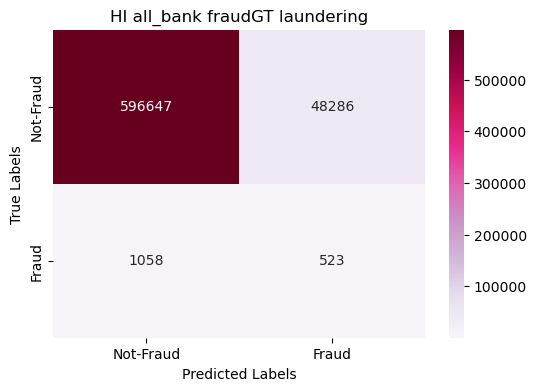

Precision: 0.01
Recall: 0.33
F1-Score: 0.02

Classification Report:
              precision    recall  f1-score        support
Not-Fraud      0.998230  0.925130  0.960291  644933.000000
Fraud          0.010715  0.330803  0.020758    1581.000000
accuracy       0.923677  0.923677  0.923677       0.923677
macro avg      0.504473  0.627967  0.490525  646514.000000
weighted avg   0.995815  0.923677  0.957993  646514.000000
              precision    recall  f1-score   support

   Not-Fraud       1.00      0.93      0.96    644933
       Fraud       0.01      0.33      0.02      1581

    accuracy                           0.92    646514
   macro avg       0.50      0.63      0.49    646514
weighted avg       1.00      0.92      0.96    646514



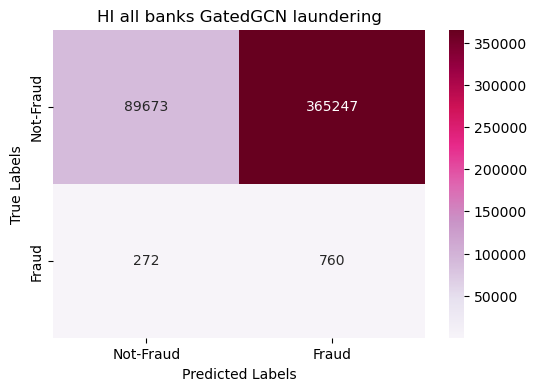

Precision: 0.00
Recall: 0.74
F1-Score: 0.00

Classification Report:
              precision    recall  f1-score        support
Not-Fraud      0.996976  0.197118  0.329157  454920.000000
Fraud          0.002076  0.736434  0.004141    1032.000000
accuracy       0.198339  0.198339  0.198339       0.198339
macro avg      0.499526  0.466776  0.166649  455952.000000
weighted avg   0.994724  0.198339  0.328421  455952.000000
              precision    recall  f1-score   support

   Not-Fraud       1.00      0.20      0.33    454920
       Fraud       0.00      0.74      0.00      1032

    accuracy                           0.20    455952
   macro avg       0.50      0.47      0.17    455952
weighted avg       0.99      0.20      0.33    455952



In [17]:
confusion_matrix_plot(HI_FraudGT, 'HI all_bank fraudGT')
confusion_matrix_plot(HI_GCN, 'HI all banks GatedGCN')

In [25]:
HI_FraudGT_patterns = pd.read_csv('all_bank_data/all_banks_HI_FraudGT_patterns.csv') 
LI_FraudGT_patterns = pd.read_csv('all_bank_data/all_banks_LI_FraudGT_patterns.csv') 
HI_GatedGCN_patterns = pd.read_csv('all_bank_data/all_banks_HI_GatedGCN_patterns.csv')
LI_GatedGCN_patterns = pd.read_csv('all_bank_data/all_banks_LI_GatedGCN_patterns.csv')



In [21]:
HI_FraudGT_patterns

,Laundering Type,Correct,False,Correct_percent,False_percent
0,BIPARTITE,617,232,0.726737,0.273263
1,CYCLE,666,242,0.733480,0.266520
2,FAN-IN,734,213,0.775079,0.224921
3,FAN-OUT,553,426,0.564862,0.435138
4,GATHER-SCATTER,1494,555,0.729136,0.270864
5,RANDOM,480,201,0.704846,0.295154
6,SCATTER-GATHER,1510,541,0.736226,0.263774
7,STACK,1322,493,0.728375,0.271625


In [22]:
correct_patterns = pd.DataFrame(columns=['Laundering Type', 'Correct_percent', 'model'])

HI_FraudGT_patterns['model'] = 'HI FraudGT'
HI_FraudGT_patterns['Correct_percent']=round(HI_FraudGT_patterns['Correct_percent']*100, 1)
HI_FraudGT_patterns = HI_FraudGT_patterns.reset_index()
HI_FraudGT_patterns['Count'] =  (
        HI_FraudGT_patterns['Correct'].astype(int).astype(str) + "/" +
        (HI_FraudGT_patterns['Correct'] + HI_FraudGT_patterns['False']).astype(int).astype(str)
    )


pattern = HI_FraudGT_patterns[['Laundering Type', 'Correct_percent', 'model','Count']]
correct_patterns = pd.concat([correct_patterns, pattern], ignore_index=True)

correct_patterns['Combined'] = (
    correct_patterns['Correct_percent'].astype(str) + "% (" +
    correct_patterns['Count'] + ")"
)


data_pivoted = correct_patterns.pivot(index="Laundering Type", columns="model", values="Combined")
data_pivoted

C:\Users\adagi\AppData\Local\Temp\ipykernel_4272\277150636.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correct_patterns = pd.concat([correct_patterns, pattern], ignore_index=True)


model,HI FraudGT
Laundering Type,
BIPARTITE,72.7% (617/849)
CYCLE,73.3% (666/908)
FAN-IN,77.5% (734/947)
FAN-OUT,56.5% (553/979)
GATHER-SCATTER,72.9% (1494/2049)
RANDOM,70.5% (480/681)
SCATTER-GATHER,73.6% (1510/2051)
STACK,72.8% (1322/1815)


In [26]:
correct_patterns = pd.DataFrame(columns=['Laundering Type', 'Correct_percent', 'model'])

HI_FraudGT_patterns['model'] = 'HI FraudGT'
HI_FraudGT_patterns['Correct_percent']=round(HI_FraudGT_patterns['Correct_percent']*100, 1)
HI_FraudGT_patterns = HI_FraudGT_patterns.reset_index()
HI_FraudGT_patterns['Count'] =  (
        HI_FraudGT_patterns['Correct'].astype(int).astype(str) + "/" +
        (HI_FraudGT_patterns['Correct'] + HI_FraudGT_patterns['False']).astype(int).astype(str)
    )

pattern = HI_FraudGT_patterns[['Laundering Type', 'Correct_percent', 'model','Count']]
correct_patterns = pd.concat([correct_patterns, pattern], ignore_index=True)





LI_FraudGT_patterns['model'] = 'LI FraudGT'
LI_FraudGT_patterns['Correct_percent']=round(LI_FraudGT_patterns['Correct_percent']*100, 1)
LI_FraudGT_patterns = LI_FraudGT_patterns.reset_index()
LI_FraudGT_patterns['Count'] =  (
        LI_FraudGT_patterns['Correct'].astype(int).astype(str) + "/" +
        (LI_FraudGT_patterns['Correct'] + LI_FraudGT_patterns['False']).astype(int).astype(str)
    )
pattern = LI_FraudGT_patterns[['Laundering Type', 'Correct_percent', 'model','Count']]
correct_patterns = pd.concat([correct_patterns, pattern], ignore_index=True)

HI_GatedGCN_patterns['model'] = 'HI GatedGCN'
HI_GatedGCN_patterns['Correct_percent']=round(HI_GatedGCN_patterns['Correct_percent']*100, 1)
HI_GatedGCN_patterns = HI_GatedGCN_patterns.reset_index()
HI_GatedGCN_patterns['Count'] =  (
        HI_GatedGCN_patterns['Correct'].astype(int).astype(str) + "/" +
        (HI_GatedGCN_patterns['Correct'] + HI_GatedGCN_patterns['False']).astype(int).astype(str)
    )
pattern = HI_GatedGCN_patterns[['Laundering Type', 'Correct_percent', 'model','Count']]
correct_patterns = pd.concat([correct_patterns, pattern], ignore_index=True)



LI_GatedGCN_patterns['model'] = 'LI GatedGCN'
LI_GatedGCN_patterns['Correct_percent']=round(LI_GatedGCN_patterns['Correct_percent']*100, 1)
LI_GatedGCN_patterns = LI_GatedGCN_patterns.reset_index()
LI_GatedGCN_patterns['Count'] =  (
        LI_GatedGCN_patterns['Correct'].astype(int).astype(str) + "/" +
        (LI_GatedGCN_patterns['Correct'] + LI_GatedGCN_patterns['False']).astype(int).astype(str)
    )
pattern = LI_GatedGCN_patterns[['Laundering Type', 'Correct_percent', 'model','Count']]
correct_patterns = pd.concat([correct_patterns, pattern], ignore_index=True)


C:\Users\adagi\AppData\Local\Temp\ipykernel_4272\1938747819.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correct_patterns = pd.concat([correct_patterns, pattern], ignore_index=True)


In [27]:
correct_patterns['Combined'] = (
    correct_patterns['Correct_percent'].astype(str) + "% (" +
    correct_patterns['Count'] + ")"
)

data_pivoted = correct_patterns.pivot(index="Laundering Type", columns="model", values="Combined")
data_pivoted

model,HI FraudGT,HI GatedGCN,LI FraudGT,LI GatedGCN
Laundering Type,,,,
BIPARTITE,NaN,NaN,72.5% (58/80),32.5% (26/80)
CYCLE,NaN,NaN,72.0% (77/107),34.6% (37/107)
FAN-IN,NaN,NaN,85.9% (110/128),52.3% (67/128)
FAN-OUT,NaN,NaN,54.9% (62/113),62.8% (71/113)
GATHER-SCATTER,NaN,NaN,74.4% (189/254),50.0% (127/254)
RANDOM,NaN,NaN,75.4% (92/122),37.7% (46/122)
SCATTER-GATHER,NaN,NaN,66.7% (124/186),59.7% (111/186)
STACK,NaN,NaN,79.3% (146/184),30.4% (56/184)
BIPARTITE,72.7% (617/849),36.6% (311/849),NaN,NaN


In [33]:
correct_patterns

,Laundering Type,Correct_percent,model
0,BIPARTITE,72.7,HI FraudGT
1,CYCLE,73.3,HI FraudGT
2,FAN-IN,77.5,HI FraudGT
3,FAN-OUT,56.5,HI FraudGT
4,GATHER-SCATTER,72.9,HI FraudGT
5,RANDOM,70.5,HI FraudGT
6,SCATTER-GATHER,73.6,HI FraudGT
7,STACK,72.8,HI FraudGT
8,BIPARTITE,72.5,LI FraudGT
9,CYCLE,72.0,LI FraudGT


In [37]:
HI_FraudGT_patterns

,index,Laundering Type,Correct,False,Correct_percent,False_percent,model
0,0,BIPARTITE,617,232,72.7,-616,HI FraudGT
1,1,CYCLE,666,242,73.3,-665,HI FraudGT
2,2,FAN-IN,734,213,77.5,-733,HI FraudGT
3,3,FAN-OUT,553,426,56.5,-552,HI FraudGT
4,4,GATHER-SCATTER,1494,555,72.9,-1493,HI FraudGT
5,5,RANDOM,480,201,70.5,-479,HI FraudGT
6,6,SCATTER-GATHER,1510,541,73.6,-1509,HI FraudGT
7,7,STACK,1322,493,72.8,-1321,HI FraudGT


In [38]:
LI_FraudGT_patterns

,index,Laundering Type,Correct,False,Correct_percent,False_percent,model
0,0,BIPARTITE,58,22,72.5,-57,LI FraudGT
1,1,CYCLE,77,30,72.0,-76,LI FraudGT
2,2,FAN-IN,110,18,85.9,-109,LI FraudGT
3,3,FAN-OUT,62,51,54.9,-61,LI FraudGT
4,4,GATHER-SCATTER,189,65,74.4,-188,LI FraudGT
5,5,RANDOM,92,30,75.4,-91,LI FraudGT
6,6,SCATTER-GATHER,124,62,66.7,-123,LI FraudGT
7,7,STACK,146,38,79.3,-145,LI FraudGT


In [ ]:
patter